# Hands-on Project 1: Dropout Regularization "Bosch"
![alt text](Images/image-6.png)<br>
- ⬆️ The paper which introduce WESAD dataset
- **Using the WESAD dataset**:
  - WESAD is a multimodal dataset for Wearable Stress and affect Detection.
    - WESAD dataset contains:
      - 15 users from user 2 to user 17, each in a csv file and in each file we have ECG data
        - i.e. it was collected with the help of 15 users, therefore it's a **multi-modal dataset**, i.e. large dataset.
      - ECG Data:
        - shows the electromyography (ECG), in order word the electrical activity of the heart of each user.

        ![alt text](Images/image-7.png)<br>
      - **Goal 1**:
        - _**Observed the features of the ECG signal and observed the effect of Dropout Regularization on the performance of a NN**_.
          - Each ECG Data has 256 features, i.e. 256 ECG features for each user file.
      - 3 classes in WESAD dataset:
        - **Class 0**: No Stress
        - **Class 1**: Moderate Stress
        - **Class 2**: Severe Stress
      - **Goal 2**:
        - _**We'll classify the stress level of each patient/user with the help of the ECG data**_.
  

# 0. Importing the libraries

In [91]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from matplotlib import style
style.use('default')

import torch
import torch.nn as nn
import torch.nn.functional as F      # <- Use to create our activation functions.
from torch.utils.data import DataLoader, TensorDataset

# from sklearn.model_selection import train_test_split

### &nbsp;&nbsp;&nbsp;&nbsp;  0.1 Checking if GPU is available

In [92]:
# Checking if GPU is available
torch.cuda.is_available()

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


### &nbsp;&nbsp;&nbsp;&nbsp;  0.2 Mounting the Google Drive and set the path

In [93]:
# Setting up Google Drive
# from google.colab import drive
# drive.mount('/content/drive')

In [94]:
# Mounting the drive
# %cd

# 1. Importing and Preprocessing the data

In [95]:
# These code can be written in a single line as well, but that will be a mix error complex score
# So to make things understandable we will make things as simple as possible.

# df2 = pd.read_csv('WESAD_data/user2.csv'  , header = None)
# df3 = pd.read_csv('WESAD_data/user3.csv'  , header = None)
# df4 = pd.read_csv('WESAD_data/user4.csv'  , header = None)
# df5 = pd.read_csv('WESAD_data/user5.csv'  , header = None)
# df6 = pd.read_csv('WESAD_data/user6.csv'  , header = None)
# df7 = pd.read_csv('WESAD_data/user7.csv'  , header = None)
# df8 = pd.read_csv('WESAD_data/user8.csv'  , header = None)
# df9 = pd.read_csv('WESAD_data/user9.csv'  , header = None)
# df10 = pd.read_csv('WESAD_data/user10.csv', header = None)
# df11 = pd.read_csv('WESAD_data/user11.csv', header = None)
# df13 = pd.read_csv('WESAD_data/user13.csv', header = None)
# df14 = pd.read_csv('WESAD_data/user14.csv', header = None)
# df15 = pd.read_csv('WESAD_data/user15.csv', header = None)
# df16 = pd.read_csv('WESAD_data/user16.csv', header = None)
# df17 = pd.read_csv('WESAD_data/user17.csv', header = None)

df2 = pd.read_csv('user2.csv'  , header = None)
df3 = pd.read_csv('user3.csv'  , header = None)
df4 = pd.read_csv('user4.csv'  , header = None)
df5 = pd.read_csv('user5.csv'  , header = None)
df6 = pd.read_csv('user6.csv'  , header = None)
df7 = pd.read_csv('user7.csv'  , header = None)
df8 = pd.read_csv('user8.csv'  , header = None)
df9 = pd.read_csv('user9.csv'  , header = None)
df10 = pd.read_csv('user10.csv', header = None)
df11 = pd.read_csv('user11.csv', header = None)
df13 = pd.read_csv('user13.csv', header = None)
df14 = pd.read_csv('user14.csv', header = None)
df15 = pd.read_csv('user15.csv', header = None)
df16 = pd.read_csv('user16.csv', header = None)
df17 = pd.read_csv('user17.csv', header = None)

# Since we want to concatenate the dataframes into one big dataframe, we will need to remove the header

In [96]:
df2.head()


,0,1,2,3,4,5,6,7,8,9,...,247,248,249,250,251,252,253,254,255,256
0,-0.874131,-0.830702,-0.780308,-0.769246,-0.777440,-0.799565,-0.838897,-0.886832,-0.953205,-1.030640,...,-0.096506,-0.103881,-0.110436,-0.102242,-0.085854,-0.045703,0.018212,0.073113,0.120639,0
1,0.161200,0.175540,0.151777,0.107118,0.047711,-0.012926,-0.069466,-0.090770,-0.093229,-0.101013,...,-0.916331,-0.914693,-0.903630,-0.857333,-0.797926,-0.745483,-0.718443,-0.706971,-0.723359,0
2,-0.763101,-0.807759,-0.834800,-0.852827,-0.867986,-0.850368,-0.783996,-0.715984,-0.650021,-0.585288,...,0.069016,0.107938,0.120639,0.124736,0.127604,0.114083,0.089501,0.057134,0.007969,0
3,-0.042015,-0.057994,-0.053077,-0.017023,0.031323,0.082946,0.135388,0.155874,0.163248,0.144402,...,0.141534,0.109167,0.089501,0.050169,-0.005551,-0.014155,0.000594,0.045253,0.087043,0
4,0.128014,0.193976,0.258301,0.295174,0.293535,0.262398,0.212413,0.159151,0.098515,0.053447,...,-1.437070,-1.522289,-1.572683,-1.611605,-1.624716,-1.624716,-1.610786,-1.596856,-1.577190,0


- We have 5 rows and 257 columns including 0 for each users
- And the last column is the class

### &nbsp;&nbsp;&nbsp;&nbsp;  1.1 Concatinating the whole user in a single file

In [97]:
# Concatenating the whole user in a single dataframe, so that we can create a big dataframe, ...
# ... Which we can use with the NN in order to see the effect of dropout regularization
data = pd.concat([df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df13, df14, df15, df16, df17])

data.shape

(90630, 257)

- Now we have 90630 samples and 257 columns in total

In [98]:
# Let's see how many classes are there
data[256].value_counts()               # <= last column i.e. 256th column is the label/class

,count
256,
1,48147
2,27244
0,15239


- We have 3 classes
  - class 0: 15239 samples
  - class 1: 48147 samples
  - class 2: 27244 samples

In [99]:
# Checking the number of classes we have
number_class = len(np.unique(data[256].value_counts()))

number_class

3

- We have 3 labels/classes in total

### &nbsp;&nbsp;&nbsp;&nbsp;  1.2 Extracting the features and labels

In [100]:
# Extracting the features
X = data[data.columns[0 :-1]].values      # <- I need everything except the last column

# Extracting the labels
Y = data[data.columns[-1]].values         # <- I need the last column
#

# 3. Splitting the dataset into train and test sets

In [101]:
# Importing the module
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

# 3. Three Steps to Cross Validation

### &nbsp;&nbsp;&nbsp;&nbsp;  3.1 Converting the labels from numpy array into pytorch tensors

In [102]:
# Convert to tensor
train_data = torch.tensor(X_train, dtype = torch.float32)
train_label = torch.tensor(Y_train).long()

test_data = torch.tensor(X_test, dtype = torch.float32)
test_label = torch.tensor(Y_test).long()

### &nbsp;&nbsp;&nbsp;&nbsp;  3.2 Converting the Training and Test Set into a Pytorch Dataset

In [103]:
# Creating the tensor train dataset
tensor_train_dataset = TensorDataset(train_data, train_label)

# Creating the tensor test dataset
tensor_test_dataset = TensorDataset(test_data, test_label)

### &nbsp;&nbsp;&nbsp;&nbsp; 3.2 Pushing the Tensor Dataset into a Tensor Dataloader Object(Cross Validation)

In [104]:
# Initializing the batch size
batchsize = 32

# Creating the training dataloader
train_dataloader = DataLoader(tensor_train_dataset, batch_size = batchsize, shuffle = True, drop_last = True)

# Creating the testing dataloader
test_dataloader = DataLoader(tensor_test_dataset, batch_size = batchsize, drop_last = True)

### &nbsp;&nbsp;&nbsp;&nbsp; Observing the batches of training and testing sets

In [105]:
for X, Y in train_dataloader:
    break

print(X.shape)
print(Y.shape)


torch.Size([32, 256])
torch.Size([32])


In [106]:
print(Y)

tensor([0, 2, 2, 1, 1, 2, 0, 1, 2, 1, 1, 1, 2, 1, 0, 1, 1, 1, 2, 1, 2, 2, 1, 2,
        2, 1, 2, 2, 1, 1, 2, 1])


In [107]:
for X, Y in test_dataloader:
    break

print(X.shape)
print(Y.shape)

torch.Size([32, 256])
torch.Size([32])


- We can see that we have a batch of 32 samples in each batch

# 4. Creating the NN Model without Dropout first

In [108]:
class ANN_Classifier(nn.Module):
    def __init__(self):
        super().__init__()

    # Initializing the layers
        # Input Layer
        self.input = nn.Linear(256, 512)

        # 1st Hidden layer
        self.hidden_1 = nn.Linear(512, 256)

        # 2nd Hidden Layer
        self.hidden_2 = nn.Linear(256, 128)

        # Output layer
        self.output = nn.Linear(128, 3)

    # Forward Pass                                                         # <- Forward Pass tells how we want to pass our features.
    def forward(self, X):

        # firstly, Passing the features through input layer, which immediately get passed through the activation function
        X = F.relu(self.input(X))

        # secondly, through the 1st hidden layer, which immediately get passed through the activation function
        X = F.relu(self.hidden_1(X))

        # then through the 2nd hidden layer
        X = F.relu(self.hidden_2(X))




        # after that, through the output layer

        # Finally, through the sigmoid activation function.
        # X = torch.sigmoid(X)                                             # <= For Classification Problem we always have sigmoid activation after the output layer, but ..
                                                                              # |=> ... Cross entropy have a built in sigmoid activation function, that is why we don't ...
                                                                              # |=> ... ❌ If use at the same time with CrossEntropy() my accuracy will be so low.
        return self.output(X)

# 5. Instantiating the model class and setting the hyperparameters

In [109]:
ANN_model = ANN_Classifier()

# Optimizer
optimizer = torch.optim.SGD(ANN_model.parameters(), momentum = 0.9, lr = 0.01)

# Loss function
loss_function = nn.CrossEntropyLoss()

# 6. Training and Testing the model(~ 15 minutes)

In [110]:
# Number of times we want to pass the entire dataset in the ANN model
number_of_epochs = 25

# Creating a 1D tensor filled with zeros, in order to track/store the losses at each  epoch
losses = torch.zeros(number_of_epochs)                                       # <- initializing the losses tensor with 1000 zeros and at each epoch we'll store the loss
                                                                             # <- During the forward propagation we'll calculate the loss and store it in the losses tensor.
# Initializing accuracy
train_accuracy = []
test_accuracy  = []

# Using a for loop to pass the dataset 1000 times into the model
for epochi in range(number_of_epochs):

    # Putting the model in the training mode
    ANN_model.train()

    # putting the model in the device 📍📍Added📍📍
    ANN_model.to(device)


    # for loop for training in batches
    batch_accuracy = []
    batch_loss     = []

    # The for loop ensure that during a single run only 32 sample will be passed
    for X,Y in train_dataloader:

      # Placing feature on device, since the model is in GPU feature should also be in GPU
      X = X.to(device)

      # Placing labels on device, since the model is in GPU feature should also be in GPU
      Y = Y.to(device)



      # Forward Propagation
      y_pred = ANN_model(X)                 # <- We pass the features x into the model and then the output of the model is our predictions y_pred.

      # We calculate/compute the loss
      loss = loss_function(y_pred, Y)                  # <- To calculate/compute the loss we pass the predictions y_pred and the true values y into the loss_function()...
                                                     # ... for that particular training epoch.



      # Backward  Propagation                          # <- Backward Propagation is the process of calculating the gradients of the loss function with respect to the model parameters.


      # Initialize the gradients to zero
      optimizer.zero_grad()                            # <- zero_grad() restart the gradients to zero at each epoch, so that the gradients/losses are not accumulated.

      # Calculating the gradients
      loss.backward()                                  # <- loss.backward() is used to calculate the gradients of the loss with respect to the parameters of the model.

      # Updating the model parameters
      optimizer.step()                                 # <- The optimizer.step() is used to update the model parameters so that the error could be minimized.

      # Append Batch loss after performing the batch training
      batch_loss.append(loss.item())

      # Putting y_pred back to cpu
      y_pred = y_pred.cpu()
      Y = Y.cpu()


      # Computing the Batch accuracy
      accuracy = 100*torch.mean((torch.argmax(y_pred, dim = 1) == Y ).float())
      # Appending the batch accuracy
      batch_accuracy.append(accuracy)

      ####### Batch concluded

    # Average training accuracy(outside the batch loop)
    train_accuracy.append(np.mean(batch_accuracy))                # <= tracking accuracy, which is the average of the batch accuracy.

    # Total Accuracy is the mean of the batch_loss
    losses[epochi] = np.mean(batch_loss)                          # <- Storing the loss at each epoch in a tensor losses. i.e. Put the computed loss into the epoch-th position of the losses tensor.
                                                                  # <- at each epoch/iteration we'll replace the respective zero with the calculated loss.
                                                                  # <- losses is the average of the batch_loss


##################################################################################➡️ testing the model ⬅️##########################################################################################

    # Putting the model on the Testing Mode
    ANN_model.eval()


    # Deactivating the gradient since during back propagation we don't need the gradient
    with torch.no_grad():                            # <- Putting gradient to false since in the training we don't any gradient or back propagation

        for X, Y in test_dataloader:

            X = X.to(device)
            Y = Y.to(device)

            # Passing the testing data to the model
            y_pred = ANN_model(X)                           # <= Here we will obtain the prediction

            # Putting the prediction back to cpu
            y_pred = y_pred.cpu()
            Y = Y.cpu()

    # Appending the test accuracy
    test_accuracy.append(100 * torch.mean((torch.argmax(y_pred, dim = 1) == Y).float()))
    # printing the losses after every 10 epochs
    if (epochi % 5) == 0:
        print(f'epochs: {epochi}, loss: {loss : 2.2f}')


epochs: 0, loss:  0.84
epochs: 5, loss:  0.77
epochs: 10, loss:  0.60
epochs: 15, loss:  0.52
epochs: 20, loss:  0.56


# 7. plotting the results

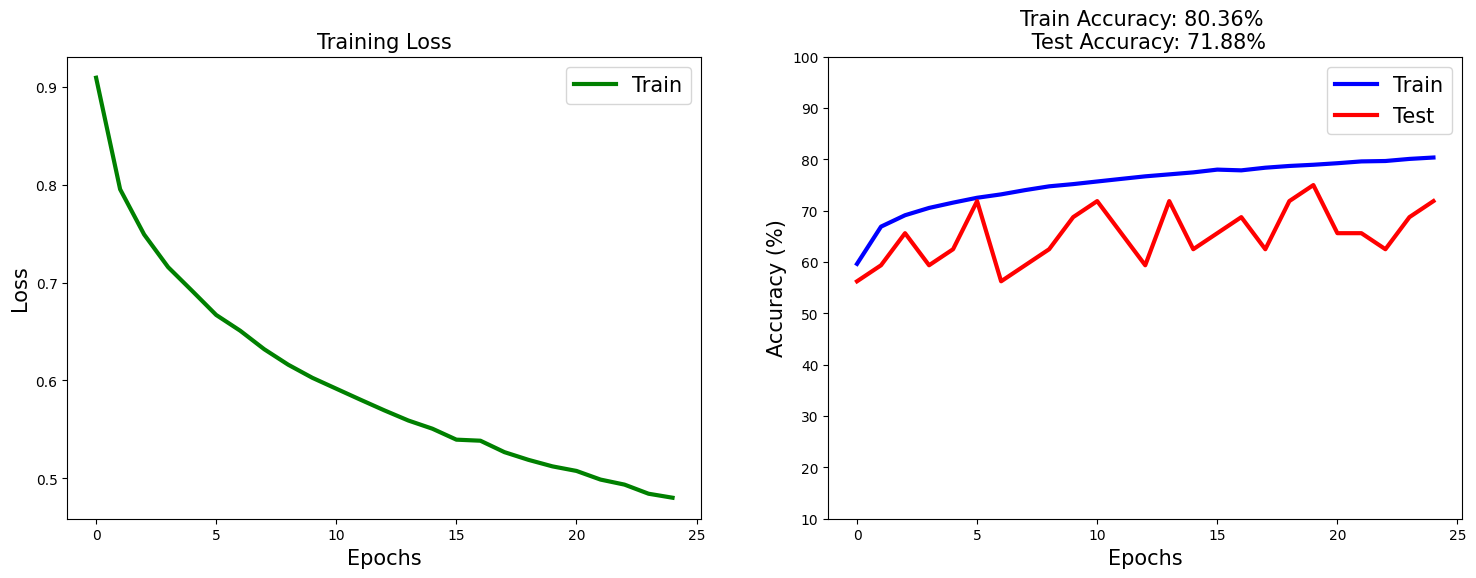

In [111]:
# Visualize the loss and accuracies after the training loop
fig, ax = plt.subplots(1, 2, figsize = (18, 6))       # <= 1 row, 2 column

ax[0].plot(losses, 'g', lw = 3, label = 'Train')      # <= ax[0] means we're plotting on the 1st column, i.e. losses on the first column, g = green
ax[0].set_xlabel('Epochs', fontsize = 15)
ax[0].set_ylabel('Loss', fontsize = 15)
ax[0].set_title('Training Loss', fontsize = 15)
ax[0].legend(fontsize = 15)

ax[1].plot(train_accuracy, 'b', lw = 3, label = 'Train')   # <= ax[1] means we're plotting on the 2nd column
ax[1].plot(test_accuracy, 'r', lw = 3, label = 'Test')
ax[1].set_xlabel('Epochs', fontsize = 15)
ax[1].set_ylabel('Accuracy (%)', fontsize = 15)
ax[1].set_ylim(10, 100)                                    # <= Setting the y limit between 10 and 110 so that we can clearly see the accuracy
ax[1].set_title(f'Train Accuracy: {train_accuracy[-1]:.2f}% \n Test Accuracy: {test_accuracy[-1]:.2f}%', fontsize = 15)       # <= Printing the final values
ax[1].legend(fontsize = 15)

plt.show()

###################################### ➡️With Dropout⬅️ ##########################################

# 7. Creating a NN with Regularization

In [112]:
class ANN_Classifier(nn.Module):
    def __init__(self):
        super().__init__()

    # Initializing the layers
        # Input Layer
        self.input = nn.Linear(256, 512)

        # 1st Hidden layer
        self.hidden_1 = nn.Linear(512, 256)

        # Dropout regularization
        self.dropout = nn.Dropout(0.2)

        # 2nd Hidden Layer
        self.hidden_2 = nn.Linear(256, 128)

        # Dropout regularization
        self.dropout = nn.Dropout(0.2)


        # Output layer
        self.output = nn.Linear(128, 3)

    # Forward Pass                                                         # <- Forward Pass tells how we want to pass our features.
    def forward(self, X):

        # firstly, Passing the features through input layer, which immediately get passed through the activation function
        X = F.relu(self.input(X))

        # secondly, through the 1st hidden layer, which immediately get passed through the activation function
        X = F.relu(self.hidden_1(X))

        # Dropout regularization
        X = self.dropout(X)

        # then through the 2nd hidden layer
        X = F.relu(self.hidden_2(X))

        # Dropout regularization
        X = self.dropout(X)




        # after that, through the output layer

        # Finally, through the sigmoid activation function.
        # X = torch.sigmoid(X)                                             # <= For Classification Problem we always have sigmoid activation after the output layer, but ..
                                                                              # |=> ... Cross entropy have a built in sigmoid activation function, that is why we don't ...
                                                                              # |=> ... ❌ If use at the same time with CrossEntropy() my accuracy will be so low.
        return self.output(X)

# 8. Instantiating the model class and setting the hyperparameters

In [113]:
ANN_model2 = ANN_Classifier()

# Optimizer
optimizer = torch.optim.SGD(ANN_model2.parameters(), momentum = 0.9, lr = 0.01)

# Loss function
loss_function = nn.CrossEntropyLoss()

# 9. Training and Testing the model(~ 15 minutes)

In [114]:
# Number of times we want to pass the entire dataset in the ANN model
number_of_epochs = 20

# Creating a 1D tensor filled with zeros, in order to track/store the losses at each  epoch
losses = torch.zeros(number_of_epochs)                                       # <- initializing the losses tensor with 1000 zeros and at each epoch we'll store the loss
                                                                             # <- During the forward propagation we'll calculate the loss and store it in the losses tensor.
# Initializing accuracy
train_accuracy = []
test_accuracy  = []

# Using a for loop to pass the dataset 1000 times into the model
for epochi in range(number_of_epochs):

    # Putting the model in the training mode
    ANN_model2.train()

    # putting the model in the device 📍📍Added📍📍
    ANN_model2.to(device)


    # for loop for training in batches
    batch_accuracy = []
    batch_loss     = []

    # The for loop ensure that during a single run only 32 sample will be passed
    for X,Y in train_dataloader:

      # Placing feature on device, since the model is in GPU feature should also be in GPU
      X = X.to(device)

      # Placing labels on device, since the model is in GPU feature should also be in GPU
      Y = Y.to(device)



      # Forward Propagation
      y_pred = ANN_model2(X)                 # <- We pass the features x into the model and then the output of the model is our predictions y_pred.

      # We calculate/compute the loss
      loss = loss_function(y_pred, Y)                  # <- To calculate/compute the loss we pass the predictions y_pred and the true values y into the loss_function()...
                                                     # ... for that particular training epoch.



      # Backward  Propagation                          # <- Backward Propagation is the process of calculating the gradients of the loss function with respect to the model parameters.


      # Initialize the gradients to zero
      optimizer.zero_grad()                            # <- zero_grad() restart the gradients to zero at each epoch, so that the gradients/losses are not accumulated.

      # Calculating the gradients
      loss.backward()                                  # <- loss.backward() is used to calculate the gradients of the loss with respect to the parameters of the model.

      # Updating the model parameters
      optimizer.step()                                 # <- The optimizer.step() is used to update the model parameters so that the error could be minimized.

      # Append Batch loss after performing the batch training
      batch_loss.append(loss.item())

      # Putting y_pred back to cpu
      y_pred = y_pred.cpu()
      Y = Y.cpu()


      # Computing the Batch accuracy
      accuracy = 100*torch.mean((torch.argmax(y_pred, dim = 1) == Y ).float())
      # Appending the batch accuracy
      batch_accuracy.append(accuracy)

      ####### Batch concluded

    # Average training accuracy(outside the batch loop)
    train_accuracy.append(np.mean(batch_accuracy))                # <= tracking accuracy, which is the average of the batch accuracy.

    # Total Accuracy is the mean of the batch_loss
    losses[epochi] = np.mean(batch_loss)                          # <- Storing the loss at each epoch in a tensor losses. i.e. Put the computed loss into the epoch-th position of the losses tensor.
                                                                  # <- at each epoch/iteration we'll replace the respective zero with the calculated loss.
                                                                  # <- losses is the average of the batch_loss


##################################################################################➡️ testing the model ⬅️##########################################################################################

    # Putting the model on the Testing Mode
    ANN_model2.eval()


    # Deactivating the gradient since during back propagation we don't need the gradient
    with torch.no_grad():                            # <- Putting gradient to false since in the training we don't any gradient or back propagation

        for X, Y in test_dataloader:

            X = X.to(device)
            Y = Y.to(device)

            # Passing the testing data to the model
            y_pred = ANN_model2(X)                           # <= Here we will obtain the prediction

            # Putting the prediction back to cpu
            y_pred = y_pred.cpu()
            Y = Y.cpu()

    # Appending the test accuracy
    test_accuracy.append(100 * torch.mean((torch.argmax(y_pred, dim = 1) == Y).float()))
    # printing the losses after every 10 epochs
    if (epochi % 5) == 0:
        print(f'epochs: {epochi}, loss: {loss : 2.2f}')

epochs: 0, loss:  0.97
epochs: 5, loss:  0.73
epochs: 10, loss:  0.54
epochs: 15, loss:  0.54


# 10. Plotting the result

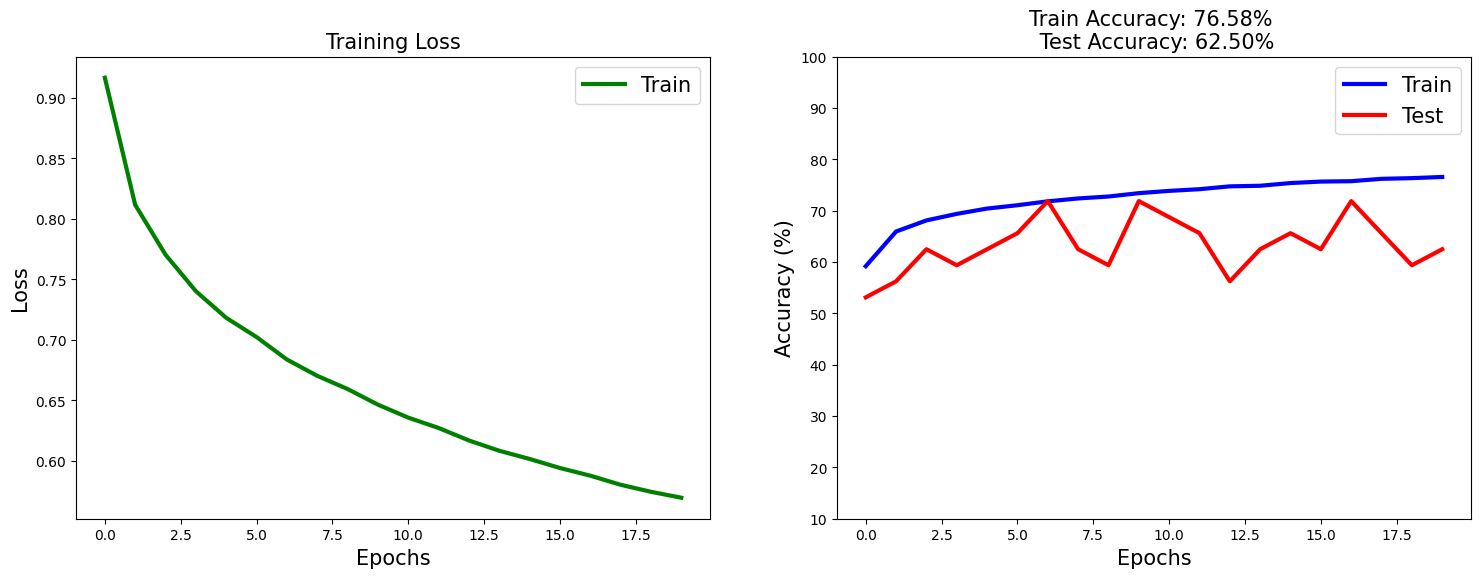

In [115]:
# Visualize the loss and accuracies after the training loop
fig, ax = plt.subplots(1, 2, figsize = (18, 6))       # <= 1 row, 2 column

ax[0].plot(losses, 'g', lw = 3, label = 'Train')      # <= ax[0] means we're plotting on the 1st column, i.e. losses on the first column, g = green
ax[0].set_xlabel('Epochs', fontsize = 15)
ax[0].set_ylabel('Loss', fontsize = 15)
ax[0].set_title('Training Loss', fontsize = 15)
ax[0].legend(fontsize = 15)

ax[1].plot(train_accuracy, 'b', lw = 3, label = 'Train')   # <= ax[1] means we're plotting on the 2nd column
ax[1].plot(test_accuracy, 'r', lw = 3, label = 'Test')
ax[1].set_xlabel('Epochs', fontsize = 15)
ax[1].set_ylabel('Accuracy (%)', fontsize = 15)
ax[1].set_ylim(10, 100)                                    # <= Setting the y limit between 10 and 110 so that we can clearly see the accuracy
ax[1].set_title(f'Train Accuracy: {train_accuracy[-1]:.2f}% \n Test Accuracy: {test_accuracy[-1]:.2f}%', fontsize = 15)       # <= Printing the final values
ax[1].legend(fontsize = 15)